<Data Analysis of Job Applicants>

# Data Analysis of Teaching Job Applications to Hallmark High College

This Notebook aims to explore and filter only teaching job applications from 100 data entries of job applications. At the end of this analysis, the daunting task of going through each teaching job application for critical review is greatly minimized. This is not an indepth analysis. It's merely an analytical filtering process to reduce the amount of time spent reviewing multiple applicants for the same job. The entered data is only as accurate as the level of explicity identified in the curriculum vitae of the applicants. 

Not everything documented in the CV of applicants could be included in this dataset (e.g, volunteer experience, professional qualification, professional certificate, extra curricular activities, achievments and awards e.t.c).

Also, each applicant is unique to the office applied for regardless of their name. What this means is that a single person applying for two or more different posts is treated as a unique entry for each post, regardless of their qualifications. This gives the analysis more variability in terms of consistent tendencies.

**Definition of key Features**
1. TED (Teaching Experience Duration): *How long have you taught(Teaching Job application)*
2. TEP(Teaching Experience Position): *What position(s) have you held while teaching(Teaching job applications)*
3. Current position: *Till date position of employment*
4. Job hopping: *How many times have you left a job(Teaching and Non-Teaching in less than 3 years (0-2)*
5. Academic Qualification (A-qual): *Academic Degrees obtained from higher institution*
6. Office Applied: *General term for job post*

NOTE:
1. Not every applicant's CV provided complete information.

In [1]:
#setup libraries
!pip install xlrd
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Hallmark secondary School.xlsx')
df.columns.values

array(['Name', 'Age', 'Gender', 'Nationality', 'Marital Status',
       'Office applied', 'Academic qualification',
       'WED/TED (Work Experience Duration/Teaching Experience Duration)',
       'WEP/TEP(Work Experience Position/Teaching Experience Position)',
       'Current position', 'Job hopping', 'Job-Type', 'Phone Number',
       'E-mail'], dtype=object)

In [3]:
#renaming the columns
df.rename(columns = {'Academic qualification':'A-qual',
                     'WED/TED (Work Experience Duration/Teaching Experience Duration)': 'TED',
                    'WEP/TEP(Work Experience Position/Teaching Experience Position)':'TEP'}, inplace = True)
df.columns.values

array(['Name', 'Age', 'Gender', 'Nationality', 'Marital Status',
       'Office applied', 'A-qual', 'TED', 'TEP', 'Current position',
       'Job hopping', 'Job-Type', 'Phone Number', 'E-mail'], dtype=object)

#### Introductory Analysis 


In [4]:
df.shape

(100, 14)

There are 100 rows meaning 100 total applicants for various job positions. There are 14 columns which represent the features.

In [5]:
df['Job-Type'].value_counts()

Teaching        60
Non-Teaching    40
Name: Job-Type, dtype: int64

There are 60 applicants that applied for a Teaching job and 40 that applied for a non Teaching job. The teaching job is what we are interested in.

In [6]:
df_teach = df[df['Job-Type'].isin(['Teaching'])].reset_index(drop = True)
df_teach['Job-Type'].value_counts()

Teaching    60
Name: Job-Type, dtype: int64

60 applicants applied for a teaching job

In [7]:
df_teach['Office applied'].unique()

array(['Vice Principal', 'Principal ', 'Yoruba Teacher', 'Teaching Staff',
       'Mathematics Teacher', 'Basic Science Teacher',
       'Civic Education Teacher', 'Business Studies Teacher',
       'Music Instructor', 'English Language Teacher',
       'Home Economics Teacher', 'C.R.S Teacher', 'Commerce Teacher',
       'I.R.S Teacher', 'French Teacher',
       'Cultural and Creative Arts Teacher', 'Basic Technology Teacher',
       'Computer Science Teacher'], dtype=object)

These are the unique offices applied for. Do note that a Teaching job-type includes the Principal and Vice Principal's office.

In [8]:
len(df_teach['Office applied'].unique())

18

The 60 applicants applied for 18 unique job posts.

**Nationality Check**

In [9]:
df_teach.Nationality.value_counts()

Nigerian    60
Name: Nationality, dtype: int64

In [10]:
for i in (df_teach['Gender'], df_teach['Nationality'], df_teach['Marital Status'], df_teach['TED'], df_teach['Job hopping']):
    Not_stated = len(i[i != 'Not Stated'])
    print (Not_stated, "applicants have their", i.name, "stated")

60 applicants have their Gender stated
60 applicants have their Nationality stated
42 applicants have their Marital Status stated
57 applicants have their TED stated
57 applicants have their Job hopping stated


In [11]:
print (df_teach.Age.unique(), "\nThere are", len(df_teach.Age.unique()), "unique ages")

[38 35 30 37 23 29 36 50 32 34 41 26 39 33  0 40 25 48 31 51] 
There are 20 unique ages


An age of 0 (zero) represents applicants that did not explicitly state their age in their CV's.

In [12]:
age = df_teach['Age']
new_age = age[age != 0]
number = list(new_age.index)
print('There are', len(number), 'Job applicants with their ages included in their CVs')

There are 50 Job applicants with their ages included in their CVs


### 1. Basic Demographic Analysis (BDA)

The basic demographic analysis of a Teaching Job type would be based on age, gender, marital Status, office applied and current position.

In [13]:
df_teach.Gender.value_counts()

Male      50
Female    10
Name: Gender, dtype: int64

In [14]:
df_teach['Marital Status'].value_counts()

Single        25
Not Stated    18
Married       17
Name: Marital Status, dtype: int64

In [15]:
df_teach[['Age','Office applied','Current position', 'Job-Type']].describe(include = 'all')
#descriptive summary of dataframe

,Age,Office applied,Current position,Job-Type
count,60.000000,60,60,60
unique,NaN,18,28,1
top,NaN,Vice Principal,Not Stated,Teaching
freq,NaN,13,24,60
mean,28.466667,NaN,NaN,NaN
std,13.902160,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN
25%,29.000000,NaN,NaN,NaN
50%,32.000000,NaN,NaN,NaN
75%,36.250000,NaN,NaN,NaN


The table above gives a basic descriptive summary about the 60 applicants that applied for a teaching job. For clarity:
1. **Count** refers to the number of entries being considered (which is 60).
2. **Unique** refers to the number of distinct value entries for a feature. NaN appears when quantitative or categorical operations cannot be performed on a feature value. For example, there is no unique, top, or frequency of top age; just like there is no mean, standard deviation, or five number summary for Gender, Marital Status, Office applied, Current postion or Job type.
3. **Top** refers to most frequent category variable
4. **Freq** refers to the frequency number for the **Top** category
5. **mean, std** refer to mean and standard deviation.
6. **five number summary (min(minimum), 25%(first quartile or 25th percentile), 50%(median or 50th percentile), 75%(third quartile or 75th percentile), max(maximum))** The five number summary represents spread/distribution of data

*General Summary*
1. 22% of applicants are applying for the role of vice principal out of 18 other unique Teaching positions
4. 24 out of 60 applicants have no currently stated position of employment
5. The mean age of the 60 applicants is roughly 28 years.
6. The spread of age values from the mean is approximately 14 years

Note that all 'Nan' values represent values that are not specific or cannot be specified.

### 2. Significance of Qualification Analysis (SQA)

The SQA would take just two key features. The Academic qualifaction (A-qual) and the Office applied. This analysis is based on the following axioms.
1. **Academic degrees in education are more relevant to the teaching practice than academic degrees in non-education.** For example, an applicant with a B.Ed. is more relevant to a teaching job than an applicant with a B.Sc.
2. **The higher the number of academic degrees in education, the more significant the qualification is to teaching practice.** For example, an applicant with an OND, HND, B.Ed., and M.Ed. is more significant to the teaching practice than an applicant with OND, HND, B.Sc., and M.Ed.

The result of this analysis is a ranked data set of each applicant with respect to the office applied and academic qualification. It is measured between (0-10).

In [16]:
df_teach[['A-qual', 'Office applied']].describe()

,A-qual,Office applied
count,60,60
unique,33,18
top,B.Ed.,Vice Principal
freq,8,13


There are 33 unique academic qualifications with **B.Ed.** only being the most frequent. The academic qualifications are academic degrees or lists of academic degrees obtained by each applicant. There are also 18 unique Job posts, with the office of the vice principal being the most sought after , having a frequency of 13.

In [17]:
#visual of A-qual and office applied

In [18]:
job_posts = list(df_teach['Office applied'].unique())

In [19]:
total = 0
count = 0
nw1 = []
for i in job_posts:
    xyzq = df_teach['Office applied'][df_teach['Office applied']==i]
    job_applied = len(xyzq)
    if job_applied >= 1:
        print(job_applied, "applicant applied for the post of", i)
        nw1.append(i)
        total = job_applied + total
        count +=1  
print(total, 'total applicants.',count , 'Offices.' )

bda1 = df_teach[df_teach['Office applied'].isin(nw1)].reset_index(drop = True)
bda1.shape

13 applicant applied for the post of Vice Principal
11 applicant applied for the post of Principal 
2 applicant applied for the post of Yoruba Teacher
5 applicant applied for the post of Teaching Staff
5 applicant applied for the post of Mathematics Teacher
4 applicant applied for the post of Basic Science Teacher
4 applicant applied for the post of Civic Education Teacher
1 applicant applied for the post of Business Studies Teacher
1 applicant applied for the post of Music Instructor
3 applicant applied for the post of English Language Teacher
1 applicant applied for the post of Home Economics Teacher
1 applicant applied for the post of C.R.S Teacher
1 applicant applied for the post of Commerce Teacher
1 applicant applied for the post of I.R.S Teacher
2 applicant applied for the post of French Teacher
1 applicant applied for the post of Cultural and Creative Arts Teacher
2 applicant applied for the post of Basic Technology Teacher
2 applicant applied for the post of Computer Science T

(60, 14)

For job posts with maximum of 2 applicants, they can each be analysed individually, but for job posts with applicants higher than 2, a further filtering process is needed.

In [20]:
total = 0
count = 0
nw = []
for i in job_posts:
    xyz = df_teach['Office applied'][df_teach['Office applied']==i]
    job_applied = len(xyz)
    if job_applied > 2:
        print(job_applied, "applicant applied for the post of", i)
        nw.append(i)
        total = job_applied + total
        count +=1  
print(total, 'total applicants.',count , 'Offices.' )

bda1 = df_teach[df_teach['Office applied'].isin(nw)].reset_index(drop = True)
bda1.shape

13 applicant applied for the post of Vice Principal
11 applicant applied for the post of Principal 
5 applicant applied for the post of Teaching Staff
5 applicant applied for the post of Mathematics Teacher
4 applicant applied for the post of Basic Science Teacher
4 applicant applied for the post of Civic Education Teacher
3 applicant applied for the post of English Language Teacher
45 total applicants. 7 Offices.


(45, 14)

In [21]:
bda1['A-qual'].unique()

array(['NCE,B.Ed.,M.Ed.', 'B.Sc.,PGDE,Dip', 'B.Sc.', 'B.Ed.', 'NCE,B.Ed.',
       'B.Tech.,PGDE', 'M.Ed.,B.Ed.', 'OND,HND,PGDE', 'B.Ed.,NCE,Dip',
       'B.A', 'B.Ed.,PGD', 'M.A,B.Ed.', 'B.Eng.,PGDE,M.Sc.',
       'B.Sc.,M.Sc.,PGDE', 'B.Sc.,OND', 'OND,B.Ed.', 'NCE,M.A,B.A',
       'OND,HND', 'OND,NCE,B.Sc.', 'B.Ed.,M.Ed.', 'M.Ed.', 'M.Ed.,B.Sc.',
       'B.Ed.,NCE', 'M.A,B.Sc.', 'B.Ed.,M.A', 'B.Sc.,PGDE',
       'B.Ed.,M.Ed.,PGDE'], dtype=object)

In [22]:
bda1.columns.values

array(['Name', 'Age', 'Gender', 'Nationality', 'Marital Status',
       'Office applied', 'A-qual', 'TED', 'TEP', 'Current position',
       'Job hopping', 'Job-Type', 'Phone Number', 'E-mail'], dtype=object)

In [23]:
len(nw)

7

In [24]:
weight_maps = {'M.Ed.': 6, 'B.Ed.': 5, 'PGDE' : 4, 'B.Tech.':3, 'B.Eng.':3,
               'M.Sc.':3, 'B.Sc.':3, 'M.A':3, 'B.A':3, 'HND':2, 'NCE':1, 'OND':1, 'Dip':1}

grade = [] #New list
for i in bda1['A-qual']:        #Traverse the column,                                
    x = i.split(",")         #convert string to list
    total_weight = 0  #initialise weight
    for j in x:
        total_weight += weight_maps.get(j, 0)          #cummulate sum while getting the value from the weight map
    grade.append((total_weight/16)*10)       #append to new list
bda1['A-qual-rank'] = grade    #create a new column
def job(dd, y):
    return dd.groupby('Office applied').get_group(y).reset_index(drop = True)

later = bda1[['Name', 'Age', 'Gender',
       'Office applied', 'A-qual', 'A-qual-rank', 'TED', 'TEP', 'Current position',
       'Job hopping', 'Phone Number', 'E-mail']]

pl = bda1[['Name', 'Age', 'Gender', 'Office applied', 'A-qual', 'A-qual-rank', 'Phone Number', 'E-mail']].sort_values('A-qual-rank',
                                                                      ascending = False, axis = 0).set_index('Name')
pl

,Age,Gender,Office applied,A-qual,A-qual-rank,Phone Number,E-mail
Name,,,,,,,
"IBEH, Peter Onyeka",39,Male,Vice Principal,"B.Ed.,M.Ed.,PGDE",9.375,+234 8063773872,opeters4ever@yahoo.com
Babatunde Ogunwole,38,Male,Vice Principal,"NCE,B.Ed.,M.Ed.",7.500,"08030438639, 08096690338",babatunde16ogunwole@yahoo.com
"OMOLODUN, FRANCIS GBOLAHAN",50,Male,Vice Principal,"M.Ed.,B.Ed.",6.875,"07032171277, 08023863907",omolodunfrancis@yahoo.com nadeyway@yahoo.co.uk
"Fadoju .Jessica, Chioma, Olubukola",48,Female,Principal,"B.Ed.,M.Ed.",6.875,"08034394225, 08083890671",fadojujess@yahoo.com
EJIOGU Dorcas Karina,35,Female,Civic Education Teacher,"B.Sc.,M.Sc.,PGDE",6.250,0803-367-5271,dorcasejiogu@yahoo.com
OKAFOR ANTHONY CHIEDU,41,Male,Vice Principal,"B.Eng.,PGDE,M.Sc.",6.250,"08035193777, 08024428963",chitonero@yahoo.com
"IGWE, Ebenezer Ndubuisi",34,Male,Vice Principal,"M.Ed.,B.Sc.",5.625,"+234(0)8063310565, +234(0)8025620938",igweebenezerndubuisi@gmail.com
ADELAKUN ADEOLA ABIODUN,41,Male,English Language Teacher,"M.A,B.Ed.",5.000,"07032737483, 09090563329",adeolakun371@gmail.com
Orhokomua Omonigho Philip,35,Male,Principal,"B.Sc.,PGDE,Dip",5.000,7061074472,philip4glory@gmail.com


The A-qual-rank (Academic qualification rank) is measured between (0-10).

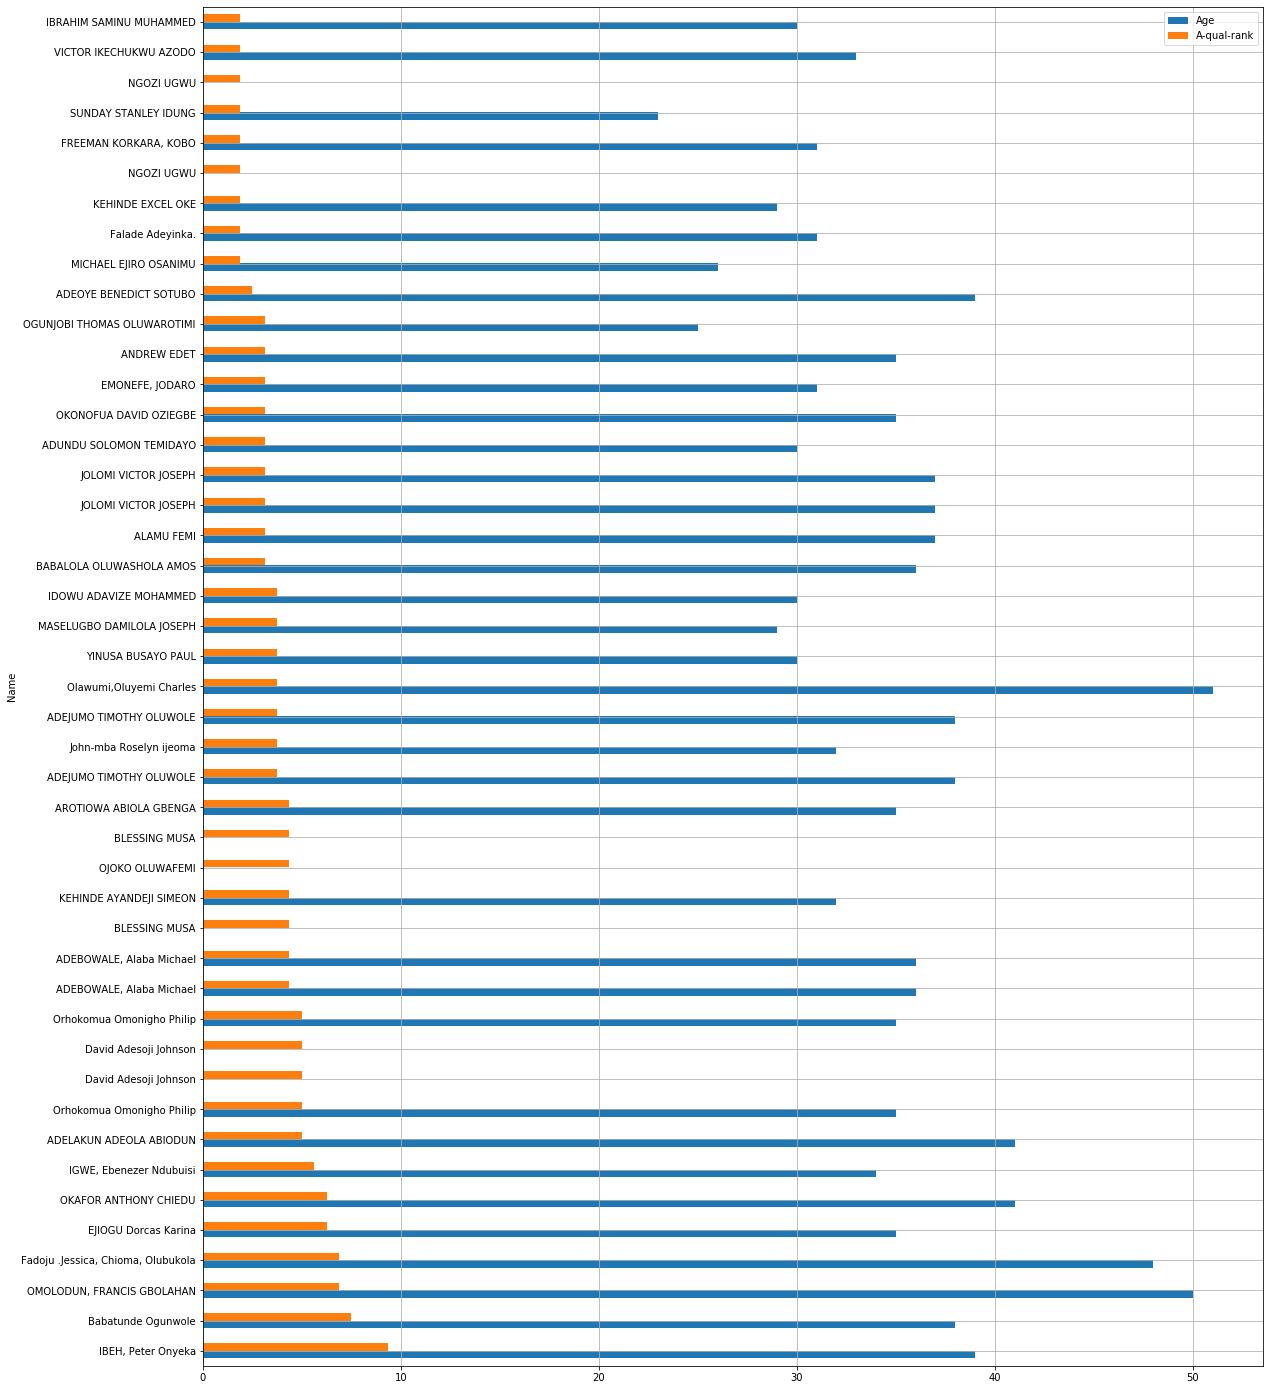

In [25]:
pl.plot(kind = 'barh', figsize = (19,25), grid = True)

This first filter data entry would serve as input to Experience and Loyalty Anlysis (LA). 

#### 3. Experience and Loyalty Analysis (EA)

The experience of applicants play a major role in ranking the fitness for the office applied. The TED feature(Teaching experience duration) is ranked in descending order and measured in years.

Loyalty analysis takes two features into consideration. 
1. Job hopping (Number of times applicant left an employment position in less than 3 years[0-2yrs])
2. TED 

A standard format of the ratio of TED to the sum of Job hopping and TED yields a value called the loyalty rank. A high loyalty rank means the applicant has a high tendency of being loyal. A low loyalty rank refers means the applicant has a low tendency of being loyal. It is measured withing the range (0-10) just like the A-qual-rank

In [26]:
lat = later[['Name', 'TED', 'Job hopping']]
lat.replace('Not Stated', 0, inplace = True)
lat.dtypes

C:\Users\Nachi\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Name           object
TED             int64
Job hopping     int64
dtype: object

In [27]:
lat['TED'].replace(0, 1, inplace = True)
lat['Job hopping'].replace(0, 1, inplace = True)
later['loyalty-rank'] = (lat['TED']/(lat['Job hopping'] + lat['TED'])) * 10
later['TED'].replace('Not Stated', np.nan, inplace = True)
later.sort_values('TED',ascending = False, axis = 0, na_position = 'last', inplace = True )
later.columns

C:\Users\Nachi\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Nachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Nachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/panda

Index(['Name', 'Age', 'Gender', 'Office applied', 'A-qual', 'A-qual-rank',
       'TED', 'TEP', 'Current position', 'Job hopping', 'Phone Number',
       'E-mail', 'loyalty-rank'],
      dtype='object')

In [28]:
len(later)

45

In [29]:
nw_fr = later[['Name', 'Age', 'Gender', 'Office applied', 'A-qual', 'TED', 'A-qual-rank','loyalty-rank', 'Phone Number',
       'E-mail']]
nw_fr.set_index('Name').head() #first 5 applicants

,Age,Gender,Office applied,A-qual,TED,A-qual-rank,loyalty-rank,Phone Number,E-mail
Name,,,,,,,,,
"Olawumi,Oluyemi Charles",51,Male,Principal,M.Ed.,25.0,3.750,9.259259,"08067534755 (WhatsApp only), 07068753333","charles.olawumi88@gmail.com, olawumicharles993..."
"OMOLODUN, FRANCIS GBOLAHAN",50,Male,Vice Principal,"M.Ed.,B.Ed.",23.0,6.875,8.846154,"07032171277, 08023863907",omolodunfrancis@yahoo.com nadeyway@yahoo.co.uk
"Fadoju .Jessica, Chioma, Olubukola",48,Female,Principal,"B.Ed.,M.Ed.",18.0,6.875,8.181818,"08034394225, 08083890671",fadojujess@yahoo.com
OKAFOR ANTHONY CHIEDU,41,Male,Vice Principal,"B.Eng.,PGDE,M.Sc.",17.0,6.250,8.500000,"08035193777, 08024428963",chitonero@yahoo.com
ANDREW EDET,35,Male,Principal,"OND,NCE,B.Sc.",17.0,3.125,9.444444,"08087688652, 07032467495",kingandrewnsa@gmail.com


In [30]:
opt = ['Vice Principal','Principal ', 'Teaching Staff', 'Mathematics Teacher','Basic Science Teacher','Civic Education Teacher'
          ,'English Language Teacher']

#function to create job post dataframes
def job(dd, y):
    return dd.groupby('Office applied').get_group(y).set_index('Name')

vp_df = job(nw_fr, opt[0])
p_df = job(nw_fr, opt[1])
Teach_df = job(nw_fr, opt[2])
Math_df = job(nw_fr, opt[3])
basicsci_df = job(nw_fr, opt[4])
civic_df = job(nw_fr, opt[5])
english_df = job(nw_fr, opt[6])

The next 7 plots are visualizations of the filtered data. By discretion, the hiring team can determine the top 2 or 3 best applicants for a subseqent and critical CV review.

**For the Vice principal's post**

In [31]:
vp_df

,Age,Gender,Office applied,A-qual,TED,A-qual-rank,loyalty-rank,Phone Number,E-mail
Name,,,,,,,,,
"OMOLODUN, FRANCIS GBOLAHAN",50,Male,Vice Principal,"M.Ed.,B.Ed.",23.0,6.875,8.846154,"07032171277, 08023863907",omolodunfrancis@yahoo.com nadeyway@yahoo.co.uk
OKAFOR ANTHONY CHIEDU,41,Male,Vice Principal,"B.Eng.,PGDE,M.Sc.",17.0,6.250,8.500000,"08035193777, 08024428963",chitonero@yahoo.com
JOLOMI VICTOR JOSEPH,37,Male,Vice Principal,B.Ed.,15.0,3.125,7.894737,08140906048; 08164288254.,profjjvictor2@gmail.com
ADEJUMO TIMOTHY OLUWOLE,38,Male,Vice Principal,"M.A,B.Sc.",14.0,3.750,6.363636,8072778227,timothyoluwole@yahoo.com
Babatunde Ogunwole,38,Male,Vice Principal,"NCE,B.Ed.,M.Ed.",12.0,7.500,9.230769,"08030438639, 08096690338",babatunde16ogunwole@yahoo.com
BLESSING MUSA,0,Female,Vice Principal,"NCE,M.A,B.A",11.0,4.375,9.166667,+2347038188880;,gohiomo@gmail.com
"ADEBOWALE, Alaba Michael",36,Male,Vice Principal,"B.Tech.,PGDE",11.0,4.375,7.333333,"0806 324 3412, 08073333837",mike1aflon@gmail.com
"IGWE, Ebenezer Ndubuisi",34,Male,Vice Principal,"M.Ed.,B.Sc.",11.0,5.625,4.782609,"+234(0)8063310565, +234(0)8025620938",igweebenezerndubuisi@gmail.com
ADEOYE BENEDICT SOTUBO,39,Male,Vice Principal,"B.Sc.,OND",10.0,2.500,9.090909,"08125587906, 07034271072",Obasot2003@yahoo.com


Text(0.5, 1.0, 'VP applicants bar plot')

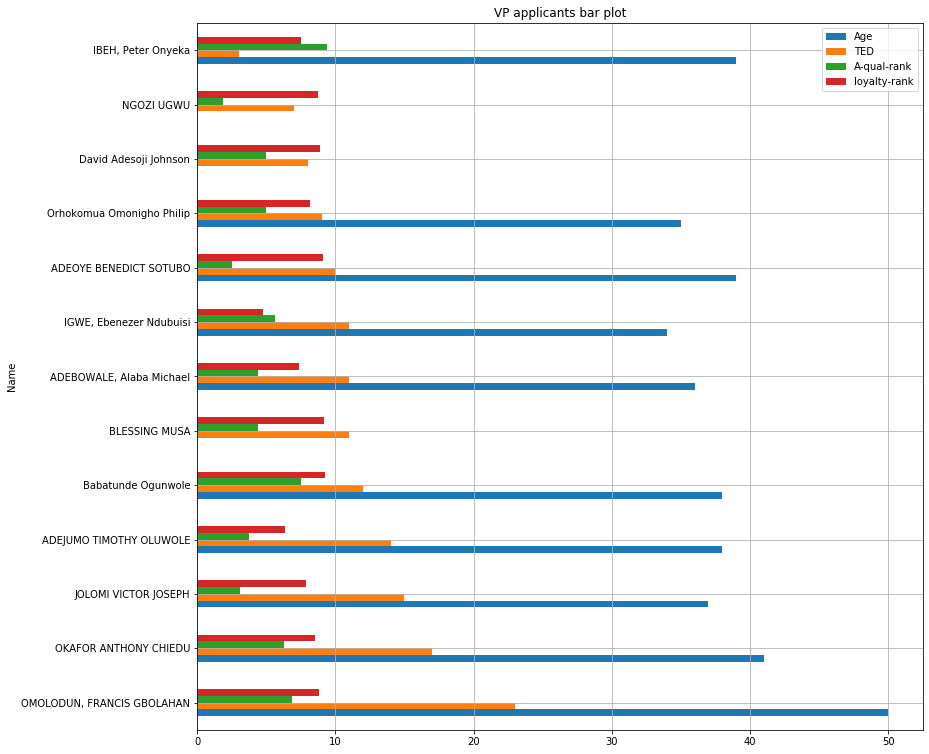

In [32]:
vp_df.plot(kind = 'barh', figsize= (13,13), grid = True)
plt.title('VP applicants bar plot')

**For the Principal's post**

In [33]:
p_df

,Age,Gender,Office applied,A-qual,TED,A-qual-rank,loyalty-rank,Phone Number,E-mail
Name,,,,,,,,,
"Olawumi,Oluyemi Charles",51,Male,Principal,M.Ed.,25.0,3.750,9.259259,"08067534755 (WhatsApp only), 07068753333","charles.olawumi88@gmail.com, olawumicharles993..."
"Fadoju .Jessica, Chioma, Olubukola",48,Female,Principal,"B.Ed.,M.Ed.",18.0,6.875,8.181818,"08034394225, 08083890671",fadojujess@yahoo.com
ANDREW EDET,35,Male,Principal,"OND,NCE,B.Sc.",17.0,3.125,9.444444,"08087688652, 07032467495",kingandrewnsa@gmail.com
ADEJUMO TIMOTHY OLUWOLE,38,Male,Principal,"M.A,B.Sc.",14.0,3.750,6.363636,8072778227,timothyoluwole@yahoo.com
BLESSING MUSA,0,Female,Principal,"NCE,M.A,B.A",11.0,4.375,9.166667,+2347038188880;,gohiomo@gmail.com
"ADEBOWALE, Alaba Michael",36,Male,Principal,"B.Tech.,PGDE",11.0,4.375,7.333333,"0806 324 3412, 08073333837",mike1aflon@gmail.com
Orhokomua Omonigho Philip,35,Male,Principal,"B.Sc.,PGDE,Dip",9.0,5.000,8.181818,7061074472,philip4glory@gmail.com
David Adesoji Johnson,0,Male,Principal,"B.Ed.,M.A",8.0,5.000,8.888889,8034485988,davidadesojijohnson@gmail.com
BABALOLA OLUWASHOLA AMOS,36,Male,Principal,"B.Ed.,PGD",8.0,3.125,6.153846,7030684141,babalolaoluwashola@gmail.com


Text(0.5, 1.0, 'Principal applicants bar plot')

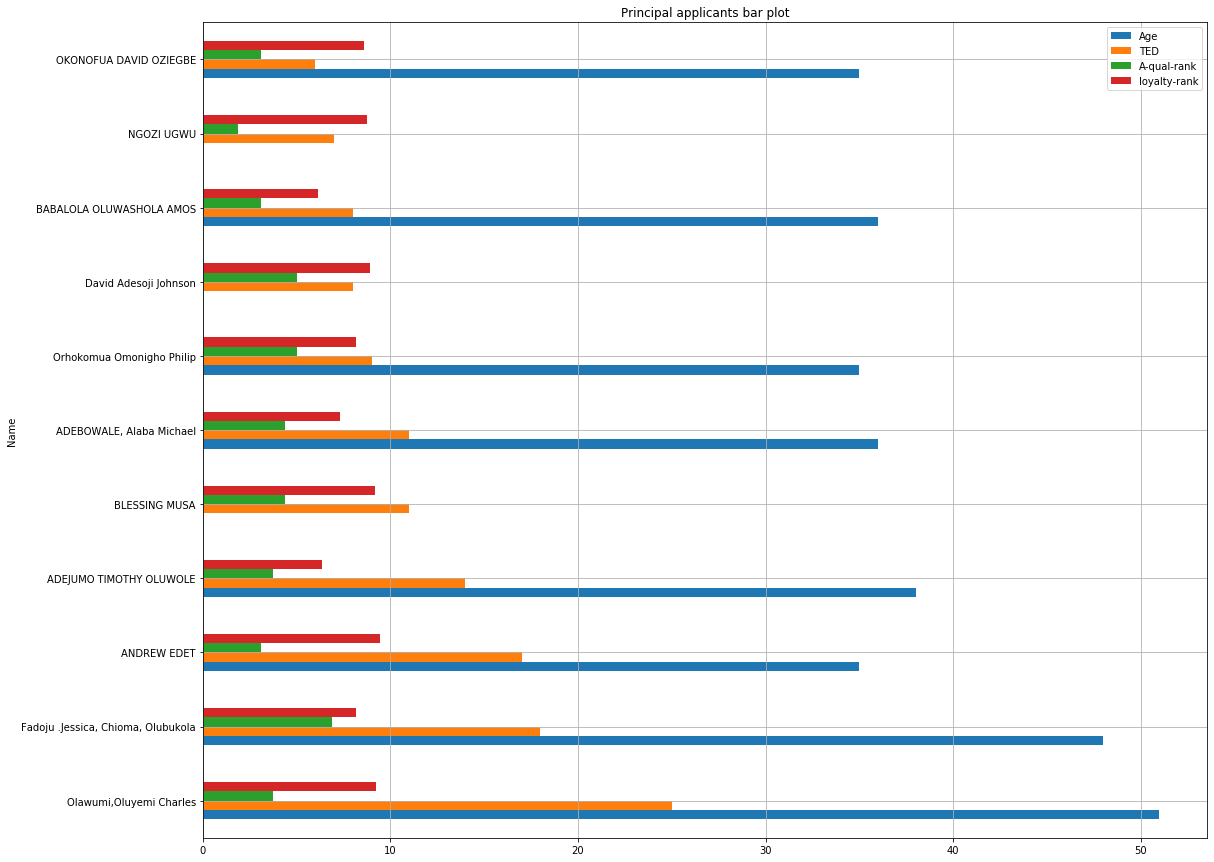

In [34]:
p_df.plot(kind = 'barh', figsize= (18, 15), grid = 'True')
plt.title('Principal applicants bar plot')

**Teaching staff post** note: This is exactly what was applied for in the mail to hhc

In [35]:
Teach_df

,Age,Gender,Office applied,A-qual,TED,A-qual-rank,loyalty-rank,Phone Number,E-mail
Name,,,,,,,,,
KEHINDE EXCEL OKE,29,Female,Teaching Staff,B.A,5.0,1.875,7.142857,8165007921,akerejahkehinde@gmail.com
MASELUGBO DAMILOLA JOSEPH,29,Male,Teaching Staff,"NCE,B.Ed.",4.0,3.750,6.666667,8164077655,damilolajoseph22@gmail.com
Falade Adeyinka.,31,Male,Teaching Staff,B.Sc.,3.0,1.875,5.000000,falade.adeyinka@yahoo.com,NaN
ADUNDU SOLOMON TEMIDAYO,30,Male,Teaching Staff,B.Ed.,2.0,3.125,6.666667,08087849758 / 09033911049.,solomonadundu6@gmail.com
IBRAHIM SAMINU MUHAMMED,30,Male,Teaching Staff,B.Sc.,0.0,1.875,5.000000,"08038096181, 08157984363",ibrahimsameen1@gmail.com


Text(0.5, 1.0, 'Teaching staff applicants bar plot')

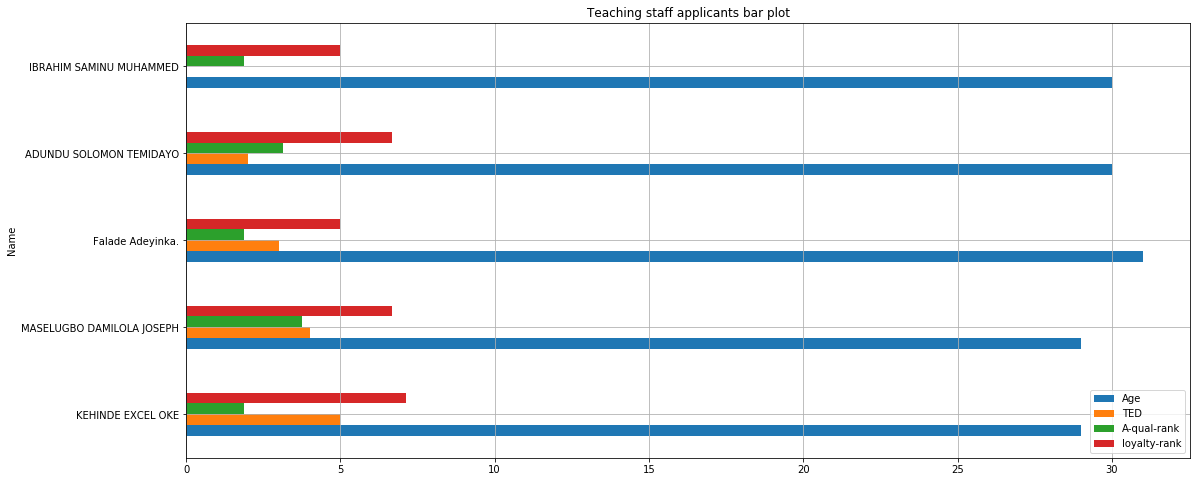

In [36]:
Teach_df.plot(kind = 'barh', figsize=(18,8), grid = True)
plt.title('Teaching staff applicants bar plot')

**Mathematics Teacher Post**

In [37]:
Math_df

,Age,Gender,Office applied,A-qual,TED,A-qual-rank,loyalty-rank,Phone Number,E-mail
Name,,,,,,,,,
JOLOMI VICTOR JOSEPH,37,Male,Mathematics Teacher,B.Ed.,15.0,3.125,7.894737,08140906048; 08164288254.,profjjvictor2@gmail.com
VICTOR IKECHUKWU AZODO,33,Male,Mathematics Teacher,B.Sc.,11.0,1.875,9.166667,234-8165649947,daresmsn3537@gmail.com
MICHAEL EJIRO OSANIMU,26,Male,Mathematics Teacher,B.Sc.,2.0,1.875,5.000000,"09034583956, 07080171358",cmiracle337@gmail.com
"EMONEFE, JODARO",31,Male,Mathematics Teacher,B.Ed.,2.0,3.125,2.857143,08164010481; 07036435642.,emonefej@gmail.com
SUNDAY STANLEY IDUNG,23,Male,Mathematics Teacher,B.Sc.,0.0,1.875,5.000000,9039267685,sundaystanley56@gmail.com


Text(0.5, 1.0, 'Mathematics teacher bar plot')

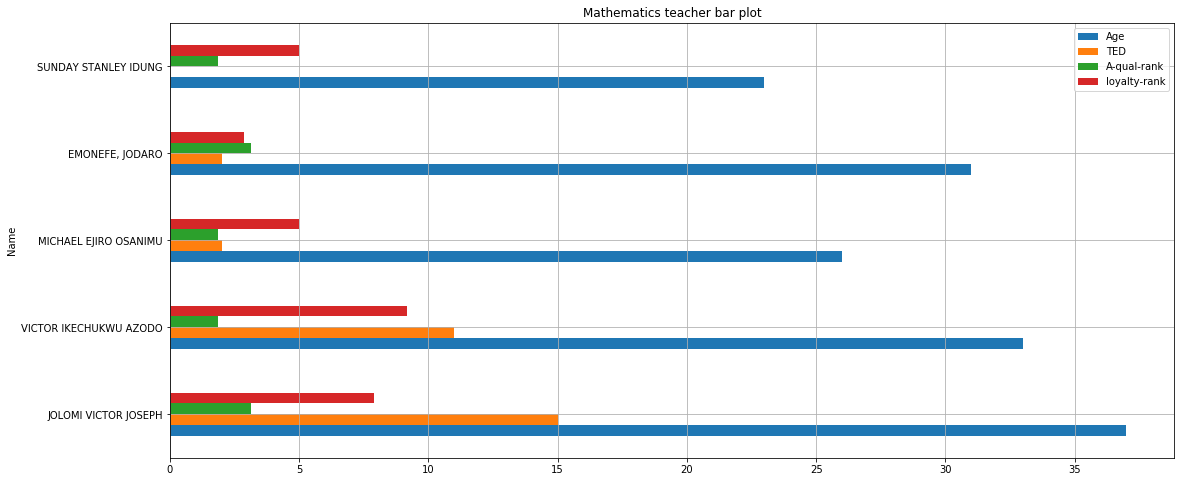

In [42]:
Math_df.plot(kind = 'barh', figsize=(18,8), grid = True)
plt.title('Mathematics teacher bar plot')

**Basic Science Post**

In [39]:
basicsci_df

,Age,Gender,Office applied,A-qual,TED,A-qual-rank,loyalty-rank,Phone Number,E-mail
Name,,,,,,,,,
AROTIOWA ABIOLA GBENGA,35,Male,Basic Science Teacher,"OND,HND,PGDE",10.0,4.375,6.666667,"08066505270, 08079917913",Arotiowabiola2000@gmail.com
OGUNJOBI THOMAS OLUWAROTIMI,25,Male,Basic Science Teacher,B.Ed.,3.0,3.125,5.000000,"08179618905, 08153046205",Ogunjobithomasrotimi@gmail.com
YINUSA BUSAYO PAUL,30,Male,Basic Science Teacher,"OND,B.Ed.",2.0,3.750,3.333333,8162645927,"paulbusayo@gmail.com,"
ALAMU FEMI,37,Male,Basic Science Teacher,B.Ed.,NaN,3.125,5.000000,"08054461115, 07033630347",NaN


Text(0.5, 1.0, 'Basic Science bar plot')

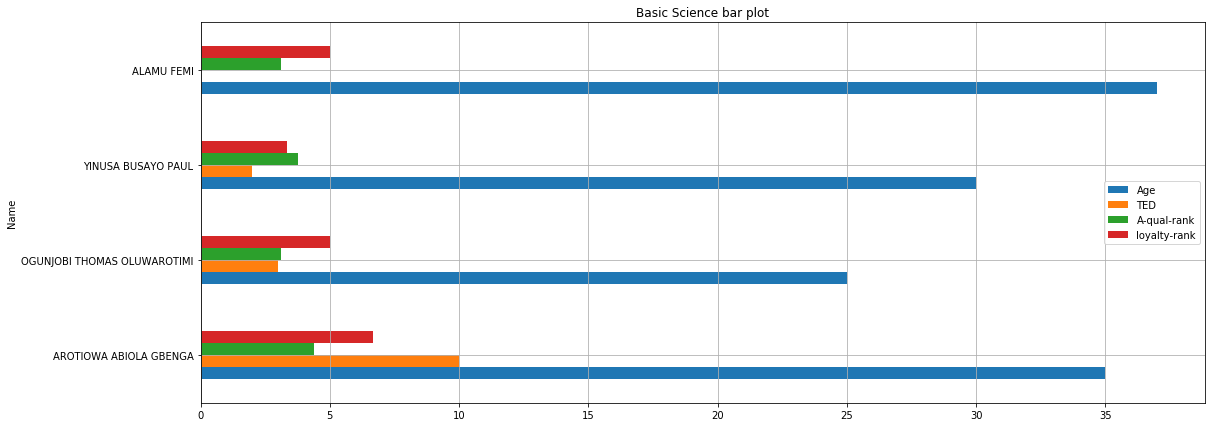

In [40]:
basicsci_df.plot(kind = 'barh', figsize=(18,7), grid = True)
plt.title('Basic Science bar plot')

**Civic Education Teacher Post**

In [43]:
civic_df

,Age,Gender,Office applied,A-qual,TED,A-qual-rank,loyalty-rank,Phone Number,E-mail
Name,,,,,,,,,
KEHINDE AYANDEJI SIMEON,32,Male,Civic Education Teacher,"B.Ed.,NCE,Dip",6.0,4.375,8.571429,8066182853,kehindesimeon66@gmail.com
IDOWU ADAVIZE MOHAMMED,30,Male,Civic Education Teacher,"NCE,B.Ed.",5.0,3.750,8.333333,08163485965 OR 07065047927,idowuadavize1@gmail.com
EJIOGU Dorcas Karina,35,Female,Civic Education Teacher,"B.Sc.,M.Sc.,PGDE",5.0,6.250,8.333333,0803-367-5271,dorcasejiogu@yahoo.com
OJOKO OLUWAFEMI,0,Male,Civic Education Teacher,"B.Sc.,PGDE",4.0,4.375,8.000000,7033607636,ojokofemi@gmail.com


Text(0.5, 1.0, 'Civic Education bar plot')

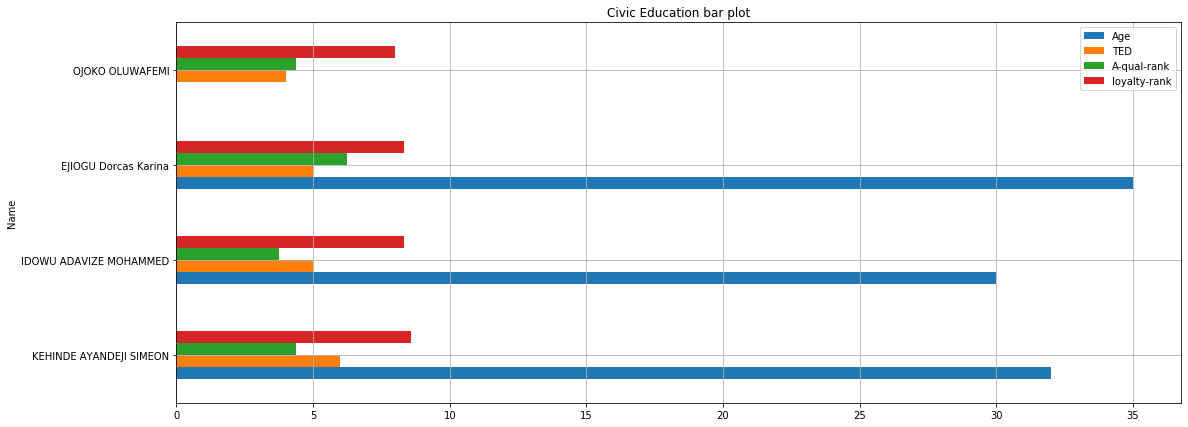

In [44]:
civic_df.plot(kind='barh', figsize = (18, 7), grid = True)
plt.title('Civic Education bar plot')

**English Language Teacher post**

In [45]:
english_df

,Age,Gender,Office applied,A-qual,TED,A-qual-rank,loyalty-rank,Phone Number,E-mail
Name,,,,,,,,,
ADELAKUN ADEOLA ABIODUN,41,Male,English Language Teacher,"M.A,B.Ed.",10.0,5.000,9.090909,"07032737483, 09090563329",adeolakun371@gmail.com
John-mba Roselyn ijeoma,32,Female,English Language Teacher,"B.Ed.,NCE",8.0,3.750,8.000000,"08030617048, 08063411090",roselynjohn1990@gmail.com
"FREEMAN KORKARA, KOBO",31,Male,English Language Teacher,B.A,6.0,1.875,4.615385,"08116205854, 08174611446.","proffreemankorkara@gmail.com, and proffreemank..."


Text(0.5, 1.0, 'English Language Teacher bar plot')

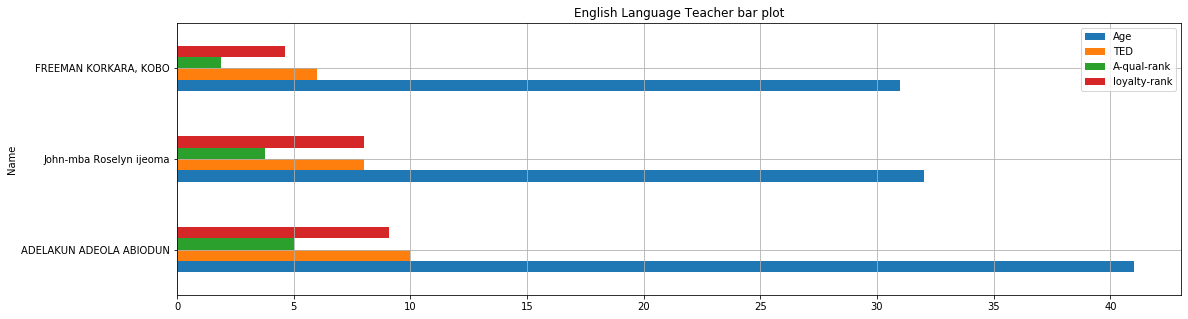

In [46]:
english_df.plot(kind = 'barh', figsize=(18,5), grid = True)
plt.title('English Language Teacher bar plot')

This notebook was created by Ifeakor Nnaemeka Praise, an aspiring data scientist.